<a href="https://colab.research.google.com/github/shreyus3003/Deep_Learning/blob/master/fastai_ls2_as1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folder = 'jaguar'
file = 'jaguar.csv'

In [0]:
folder = 'cheetah'
file = 'cheetah.csv'

In [0]:
folder = 'leopard'
file = 'leopard.csv'

In [0]:
path = Path('data/cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/cats/leopard.csv'),
 PosixPath('data/cats/cheetah'),
 PosixPath('data/cats/leopard'),
 PosixPath('data/cats/cheetah.csv'),
 PosixPath('data/cats/jaguar.csv'),
 PosixPath('data/cats/jaguar')]

In [0]:
classes = ['cheetah','jaguar', 'leopard'] 

In [0]:
download_images(path/file, dest, max_pics=200, max_workers=0)
#path/file
dest

PosixPath('data/cats/leopard')

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cheetah


jaguar


leopard


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['cheetah', 'jaguar', 'leopard']

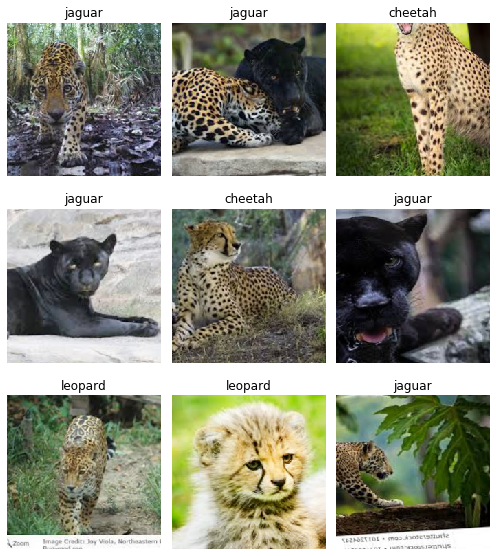

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'jaguar', 'leopard'], 3, 304, 76)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.925376,1.371473,0.565789,00:04
1,1.604477,2.043441,0.355263,00:04
2,1.543214,2.105645,0.381579,00:04
3,1.458175,2.065219,0.407895,00:04


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

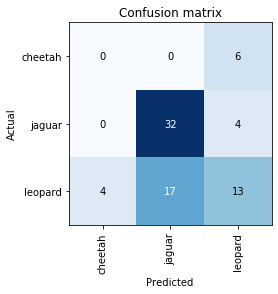

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [0]:
learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)
